### Employee Turnover Analytics

In [216]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [217]:
data_raw = pd.read_csv('HR_comma_sep.csv')

In [218]:
data_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [219]:
data_raw.isna().sum()
num_cols = data_raw.select_dtypes(exclude='O')
cat_cols = data_raw.select_dtypes(include='O')

### Heatmap

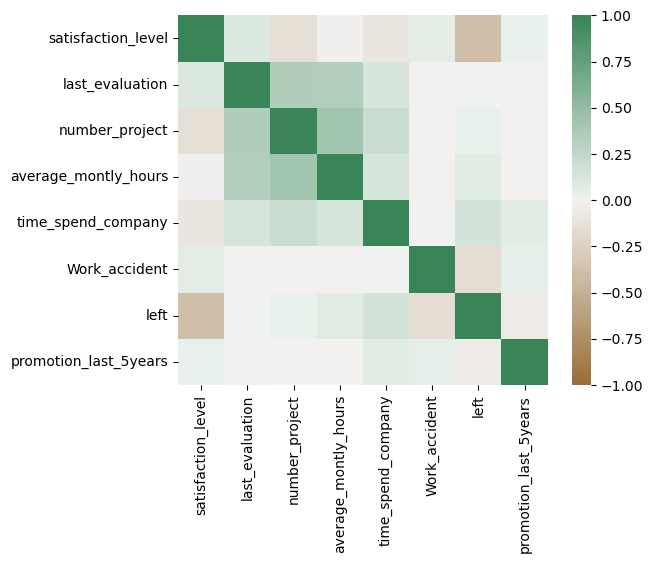

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data_raw.drop(columns = ['sales', 'salary', ]).corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

### Distribution Plot

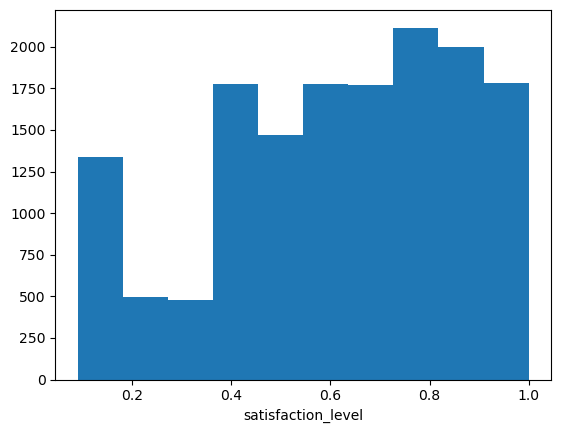

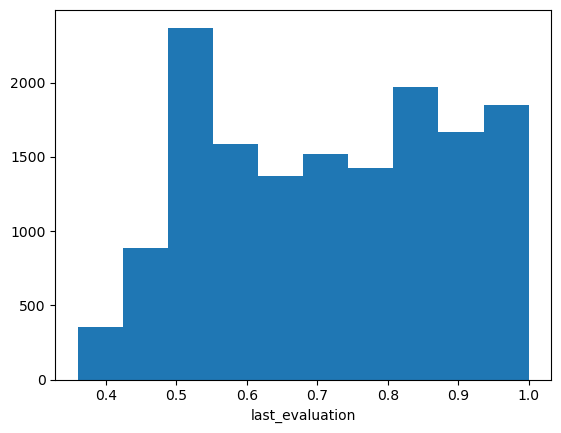

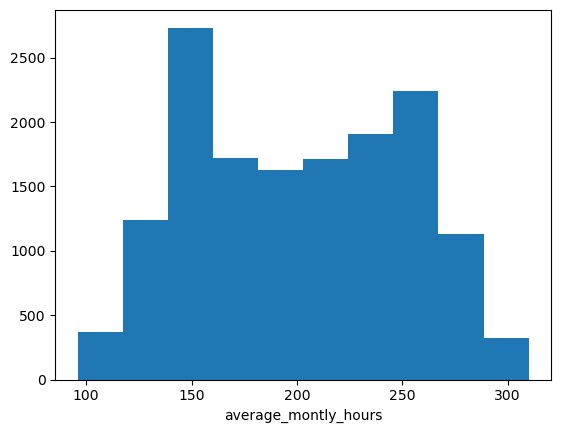

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data_raw.satisfaction_level)
plt.xlabel('satisfaction_level')
plt.show()

plt.hist(data_raw.last_evaluation)
plt.xlabel('last_evaluation')
plt.show()

plt.hist(data_raw.average_montly_hours)
plt.xlabel('average_montly_hours')
plt.show()

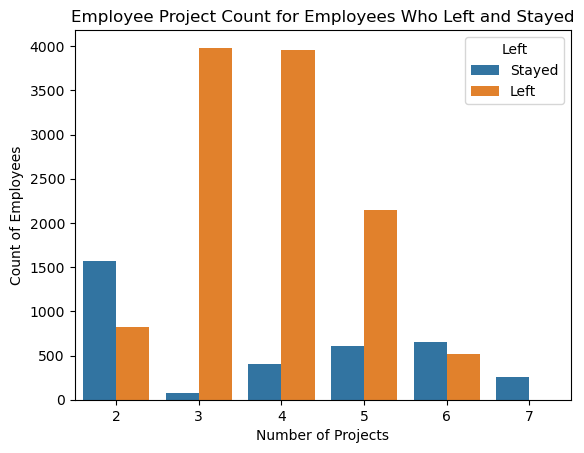

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
data_raw['left'] = data_raw['left'].astype('str')
sns.countplot(data_raw, x='number_project', hue='left')
plt.title('Employee Project Count for Employees Who Left and Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

### Inference -> Higher the number of projects handled, higher the chance that people leave the organization. 

In [223]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()

In [224]:
cols = ['satisfaction_level', 'last_evaluation']

In [225]:
data_raw['left'] 

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: object

In [226]:
data_people_left = data_raw[data_raw['left'] == '1']
data_for_cluster = data_people_left[cols]

In [227]:
data_for_cluster

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [228]:
n_clusters = 3
kmn = KMeans(n_clusters=n_clusters)

In [229]:
data_for_cluster_std = ss.fit_transform(data_for_cluster)
indices = kmn.fit_predict(data_for_cluster_std)

C:\Users\sreenathk\AppData\Local\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [230]:
labels = kmn.labels_

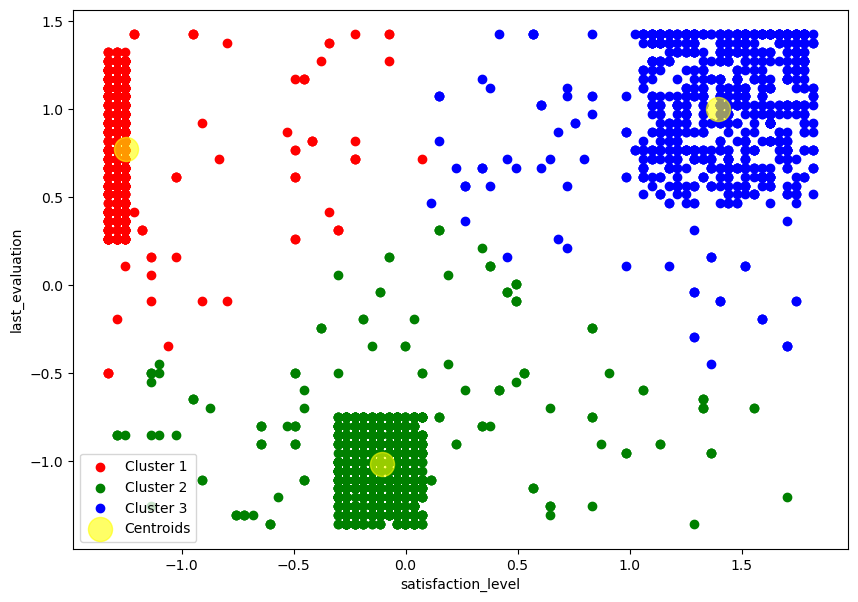

In [231]:
# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Plot each cluster with a different color
colors = ['r', 'g', 'b']
for i in range(n_clusters):
    ax.scatter(data_for_cluster_std[indices == i, 0], data_for_cluster_std[indices == i, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centers
centers = kmn.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.6, label='Centroids')

ax.set_xlabel('satisfaction_level')
ax.set_ylabel('last_evaluation')

ax.legend()
plt.show()

(array([ 939.,    0.,    0.,    0.,    0., 1667.,    0.,    0.,    0.,
         965.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

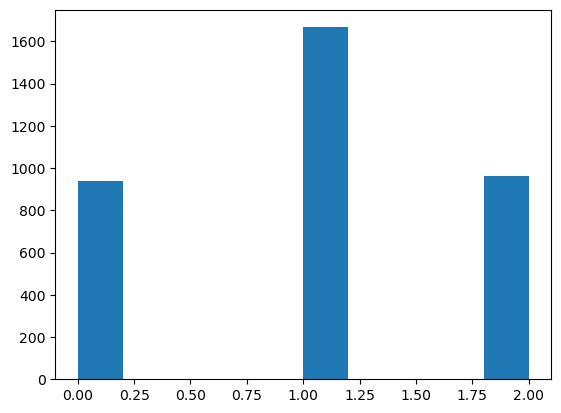

In [232]:
plt.hist(indices)

### Interpretation -> People with low ratings are with moderate satisfaction levels may leave the company. People with low satisfaction even with high evaluation are likely to leave. People with high satisfaction and high evaluation are also likely to leave.

### 4.	Handle the left Class Imbalance using the SMOTE technique.

### 5.	Perform 5-fold cross-validation model training and evaluate performance.

In [287]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
skf = StratifiedKFold(n_splits=5)
ss = StandardScaler()

In [256]:
num_cols = data_raw.select_dtypes(exclude='O').columns
cat_cols = data_raw.select_dtypes(include='O').columns

In [275]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(sparse=False)

In [276]:
oe_encoded = oe.fit_transform(data_raw[cat_cols])

C:\Users\sreenathk\AppData\Local\anaconda31\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [277]:
oe_encoded
cat_cols_appended = [f'{col}_{cat}' for i, col in enumerate(cat_cols) for cat in oe.categories_[i]]

In [278]:
oe_encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [279]:
cat_cols_appended

['left_0',
 'left_1',
 'sales_IT',
 'sales_RandD',
 'sales_accounting',
 'sales_hr',
 'sales_management',
 'sales_marketing',
 'sales_product_mng',
 'sales_sales',
 'sales_support',
 'sales_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [281]:
data_cleaned = ss.fit_tran(data_raw[num_cols].join(pd.DataFrame(oe_encoded, columns=cat_cols_appended)) 

In [282]:
data_train, data_test = train_test_split(data_cleaned, random_state=123)
data_train['kfold_tag'] = 9999

In [283]:
# Shuffling and resetting the raws and drops the old indices from the columns of new dataframe
data_train_cv = data_train.sample(frac=1).reset_index(drop=True) 

In [284]:
data_train_cv.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left_0,left_1,sales_IT,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,kfold_tag
0,0.11,0.8,6,304,4,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9999


In [244]:
# Assigning cross validation fold indices for all the training data
for fold , (train_indices, valid_indices) in enumerate(skf.split(data_train_cv, data_train_cv.left), start=1):
    data_train_cv.loc[valid_indices, 'kfold_tag'] = fold
data_train_cv.groupby(['kfold_tag', 'left'])[['left']].count()

left
kfold_tag left      
1         0     1715
          1      535
2         0     1715
          1      535
3         0     1715
          1      535
4         0     1716
          1      534
5         0     1715
          1      534

In [247]:
data_train_cv.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'kfold_tag'],
      dtype='object')

In [249]:
### Chosing the data columns for training
feature_cols_train = [col for col in data_train_cv.columns if col not in ['left', 'kfold_tag']]

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary']

In [ ]:
num_pipeline = Pipeline([('scaler',StandardScaler())])

In [26]:
cat_pipeline = Pipeline([('oe', OneHotEncoder())])

In [ ]:
master_pipeline = Pipeline()